## Модуль 02: Математическая статистика

### Лабораторная работа 2.1.

1. Произвести ряд из 20 измерений какого-либо параметра:
    - число машин на стоянке определенного цвета,
    - высота предметов на столе,
    - температура воздуха за месяц.
2. Построить гистограмму и кумуляту.

In [99]:
# Температура за первые 20 дней марта 2024 года
X = [5,3,6,3,1,0,3,0,2,3,3,4,4,6,7,8,6,4,3,8]
X

[5, 3, 6, 3, 1, 0, 3, 0, 2, 3, 3, 4, 4, 6, 7, 8, 6, 4, 3, 8]

In [100]:
np.histogram(X)

(array([2, 1, 1, 6, 0, 3, 1, 3, 1, 2], dtype=int64),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]))

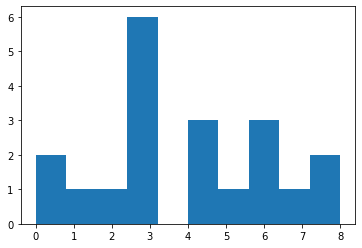

In [101]:
# Гистограмма
import matplotlib.pyplot as plt
plt.hist(X)
plt.show()

In [102]:
np.cumsum(X)

array([ 5,  8, 14, 17, 18, 18, 21, 21, 23, 26, 29, 33, 37, 43, 50, 58, 64,
       68, 71, 79], dtype=int32)

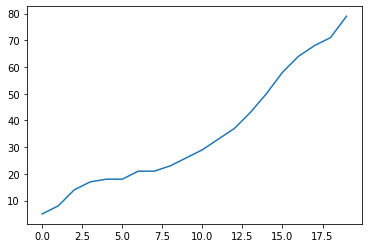

In [104]:
# Кумулянта 
plt.plot(range(len(X)), np.cumsum(X))
plt.show()

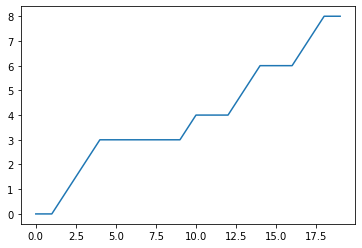

In [103]:
# Кумулянта 
plt.plot(range(len(X)), np.sort(X))
plt.show()

### Лабораторная работа 2.2.

1. Определить значение некоторого параметра: 
    - возраст сотрудников,
    - оценочная стоимость авто на парковки при помощи nomerogramm,
    - число дождливых дней в месяце по данным meteoinfo.ru
2. Посчитать числовые характеристики выборки.

In [142]:
# Число дождливых дней за 2023 года Санкт-Петербург
rain1 = [11, 9, 8, 4, 0, 5, 9, 8, 6, 6, 10, 11]
rain2 = np.array(rain1)

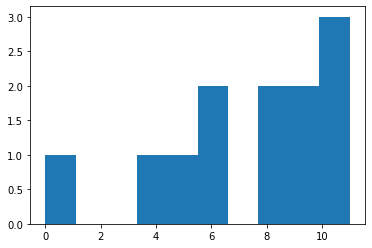

In [158]:
import matplotlib.pyplot as plt
plt.hist(rain2)
plt.show()

In [143]:
import math
from scipy import stats

In [144]:
# Арифметическое среднее
arif_s1 = sum(rain1)/len(rain1)
arif_s2 = np.mean(rain2)

print(f"Арифметическое среднее ('в ручную'): {arif_s1}")
print(f"Арифметическое среднее (библиотека): {arif_s2}")

Арифметическое среднее ('в ручную'): 7.25
Арифметическое среднее (библиотека): 7.25


In [145]:
# Геометрическое среднее
geom_s1 = math.prod(rain1) ** (1/len(rain1))
geom_s2 = stats.gmean(rain2)

print(f"Геометрическое среднее ('в ручную'): {geom_s1}")
print(f"Геометрическое среднее (библиотека): {geom_s2}")

Геометрическое среднее ('в ручную'): 0.0
Геометрическое среднее (библиотека): 0.0


In [148]:
# Гармоническое среднее
# garm_s1 = len(rain1) / sum(1/x for x in rain1) # деление на 0
garm_s2 = stats.hmean(rain2)

# print(f"Гармоническое среднее ('в ручную'): {garm_s1}")
print(f"Гармоническое среднее (библиотека): {garm_s2}")

Гармоническое среднее (библиотека): 0.0


In [151]:
# Квадратическое среднее
qwad_s1 = math.sqrt(sum(x**2 for x in rain1)/len(rain1))
qwad_s2 = np.sqrt(np.mean(rain2 ** 2))

print(f"Квадратическое среднее ('в ручную'): {qwad_s1}")
print(f"Квадратическое среднее (библиотека): {qwad_s2}")

Квадратическое среднее ('в ручную'): 7.879297769048542
Квадратическое среднее (библиотека): 7.879297769048542


In [152]:
# Кубическое среднее
qub_s1 = (sum(x**3 for x in rain)/len(rain)) ** (1/3)
qub_s2 = np.cbrt(np.mean(rain ** 3))

print(f"Кубическое среднее ('в ручную'): {qub_s1}")
print(f"Кубическое среднее (библиотека): {qub_s2}")

Кубическое среднее ('в ручную'): 8.260928278518024
Кубическое среднее (библиотека): 8.260928278518024


In [137]:
# Медиана
mediana = np.median(rain)
print(f"Медиана: {mediana}")

Медиана: 8.0


In [157]:
#Доверительный интервал
alpha = 0.05 #уровень значимости
mean = np.mean(rain2) #среднее значение
sigma = np.std(rain2) #стандартное отклонение
n = 12 #размер выборки
Ci = stats.norm.interval(alpha, loc=mean, scale=sigma/np.sqrt(n))
print(f"Доверительный интервал: {Ci}")

Доверительный интервал: (7.194145091544014, 7.305854908455986)


### Лабораторная работа 2.3.

Некто утверждает, что в городе N в месяц 10 дождливых дней. Вы с ним несогласны, и утверждаете, что не более 7.

Провести проверку гипотезы, взяв данные за 10 случайных месяцев в этом городе на сайте с архивом погоды.

Определить среднее m и дисперсию D этой выборки.

Этапы проверки параметрической статистической гипотезы с помощью критерия значимости:

In [9]:
from scipy.stats import norm
import math

In [4]:
# Число дождливых дней за 10 случайных месяцев, Санкт-Петербург
rain = [9, 8, 4, 5, 9, 8, 6, 6, 10, 11]
rain = np.array(rain)

1) сформулировать проверяемую ($Н_0$) и альтернативную ($Н_1$) гипотезы;

$H_0:θ=10$, что в Санкт-Петербурге в месяц 10 дождливых дней

$H_1:θ<10$, что в Санкт-Петербурге в месяц менее 10 дождливых дней

2) назначить уровень значимости α;

In [5]:
alpha = 0.05

3) выбрать статистику Z критерия для проверки гипотезы $Н_0$;

In [6]:
# в качестве статистики критерия используем статистику математического ожидание - выборочное среднее
mean = np.mean(rain)
mean

7.6

4) определить выборочное распределение статистики Z при условии, что верна гипотеза $Н_0$;

In [7]:
D = np.var(rain)
n = 10
print(f"Дисперсия = {D}")
print(f"Размерность выборки = {n}")

Дисперсия = 4.64
Размерность выборки = 10


$Z = \frac{\overline{X}-10}{\sqrt{\frac{4.64}{10}}} $

5) в зависимости от формулировки альтернативной гипотезы определить критическую область $V_k$ одним из неравенств или совокупности неравенств:

    - z > Z{1-α}
    - Z < zα
    - Z < z{α/2} и Z > z{1 - α/2};

In [10]:
# Z < zα
za = norm.ppf(0.05)
za

-1.6448536269514729

6) получить выборку наблюдений и вычислить выборочные значения zv статистики критерия;

In [11]:
zv = (7-10)/((4.64/10)**(1/2))
zv

-4.404151646360277

7) принять статистическое решение:

если zv ∈ $V_k$, то отклонить гипотезу $Н_0$ как не согласующуюся с результатами наблюдений;

если zv ∈ V \ $V_k$, то принять гипотезу $Н_0$, т. е. считать, что гипотеза $Н_1$ не противоречит наблюдениям.

статистическое решение: так как выборочное значение статистики критерия принадлежит критическо области, гипотеза $Н_0$ отклоняется. Следует считать, что в Санкт-Петербурге менее 10 дождливых дней в месяц

8*) Вычисление ошибки 1го и 2го рода

$error 1 = Ф_{1}(\frac{mean - 10}{\sqrt{\frac{4.64}{10}}})$

In [12]:
x1 = abs((mean-10)/((0.464)**(1/2)))
x1

3.523321317088221

$error 2 = Ф_{1}(\frac{mean - 7}{\sqrt{\frac{4.64}{10}}})$

In [14]:
x2 = abs((mean-7)/((0.464)**(1/2)))
x2

0.8808303292720546

In [15]:
f = norm.cdf

In [16]:
print(f"Ошибка 1го: {(1-f(x1))*100}%")
print(f"Ошибка 2го: {(1-f(x2))*100}%")

Ошибка 1го: 0.021308717524870513%
Ошибка 2го: 18.92048306663623%


### Лабораторная работа 2.4.

1. Используя данные о погоде с одного из рассмотренных ранее сайтов найти корреляцию между:
    - температурой и влажностью,
    - температурой и силой ветра,
    - направлением ветра и осадками.

In [8]:
#москва июнь 2023
t = [21,23,7,14,16,20,18,22,21,15,16,19,20,24,25,26,27,24,21,24,20,25,19,17,23,23,22,21,19,18]
vlag = [37,41,88,45,58,45,60,42,27,31,31,32,29,28,24,31,28,28,24,42,28,30,85,69,38,46,54,60,45,66] 
sila_vetra = [4.2,4.1,5.8,4.3,4.7,3.9,4.0,2.0,3.8,6.2,5.0,5.8,4.2,3.6,2.9,3.6,4.3,3.0,3.6,4.4,4.0,3.0,
              1.4,4.5,2.3,1.8,4.0,5.0,5.1,1.5] 
naprav_vetra = [8,2,1,4,4,4,8,4,4,1,5,5,3,5,5,5,5,1,1,6,1,8,3,1,2,3,7,7,7,3] 
rain = [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0]
# с 1
# ю 2
# в 3
# з 4
# св 5
# сз 6
# юв 7
# юз 8

# нет осадков 0
# небольшой дождь 1
# сильный дождь 2

In [9]:
from scipy.stats import pearsonr

In [10]:
pearsonr(t,vlag)

(-0.5800516757482864, 0.0007799204270050949)

In [11]:
pearsonr(t,sila_vetra)

(-0.4604522538515449, 0.01045260792373807)

In [12]:
pearsonr(naprav_vetra,rain)

(0.10145143842372606, 0.5937285701724837)

In [18]:
import numpy as np
X = np.array([t,vlag,sila_vetra,naprav_vetra,rain])

In [19]:
np.corrcoef(X)

array([[ 1.        , -0.58005168, -0.46045225,  0.2985265 , -0.32983498],
       [-0.58005168,  1.        , -0.05684481, -0.06442581,  0.23992942],
       [-0.46045225, -0.05684481,  1.        ,  0.08014588,  0.30720495],
       [ 0.2985265 , -0.06442581,  0.08014588,  1.        ,  0.10145144],
       [-0.32983498,  0.23992942,  0.30720495,  0.10145144,  1.        ]])